Imports

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load dataset
data = pd.read_csv('cleaned_univeristy_rank.csv')

In [2]:
# Identifying categorical and numeric columns and their distributions
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']

In [3]:
# Identifying the primary target variable and secondary variables
target_variable = 'University Rank' 
secondary_targets = ['Teaching Score', 'Research Score']
tertiary_targets = ['Location', 'Citations Score','Industry Income Score']

-----

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume X contains your independent variables and y is the dependent variable (e.g., Overall Score)
X = data[['Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score']]
y = data['OverAll Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Interpret the coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error: 1.7477941586942904
                      Variable  Coefficient
0               Teaching Score     0.290990
1               Research Score     0.310527
2              Citations Score     0.289272
3        Industry Income Score     0.018037
4  International Outlook Score     0.074261


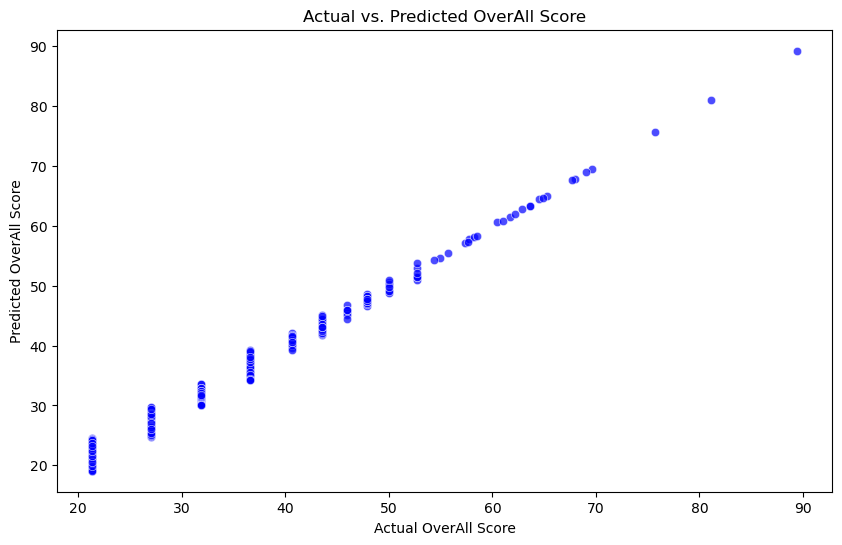

In [5]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, color='blue', alpha=0.7)
plt.title('Actual vs. Predicted OverAll Score')
plt.xlabel('Actual OverAll Score')
plt.ylabel('Predicted OverAll Score')
plt.show()

Accuracy: 0.99


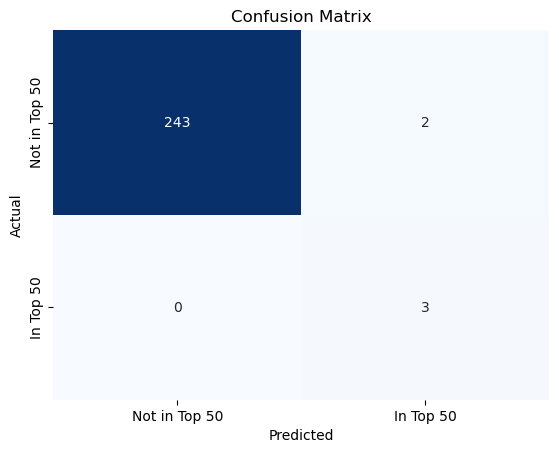

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       245
           1       0.60      1.00      0.75         3

    accuracy                           0.99       248
   macro avg       0.80      1.00      0.87       248
weighted avg       1.00      0.99      0.99       248



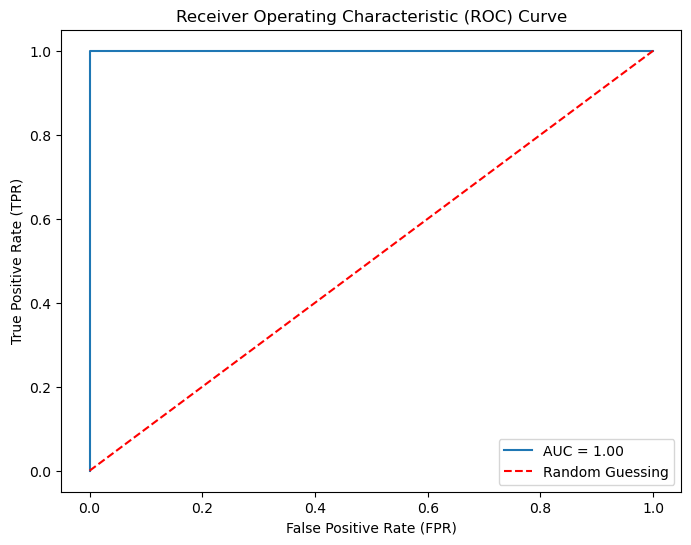

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


# Define features (X) and target variable (y)
features = ['Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score']
X = data[features]
y = (data['University Rank'] <= 50).astype(int)  # Binary outcome: 1 if in top 50, 0 otherwise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not in Top 50', 'In Top 50'], yticklabels=['Not in Top 50', 'In Top 50'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print('Classification Report:')
print(classification_report(y_test, predictions))


# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

Cross-validated AUC scores: [1.         1.         0.99947917 0.99821429 1.        ]
Mean AUC: 0.9995386904761905


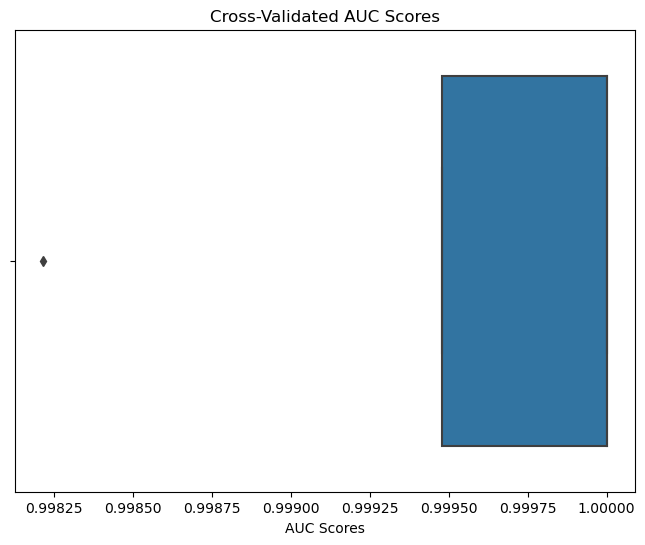

In [7]:
# cross validate

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming you have already defined X and y

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Perform stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculate cross-validated AUC scores
cv_auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

# Display the cross-validated AUC scores
print("Cross-validated AUC scores:", cv_auc_scores)
print("Mean AUC:", cv_auc_scores.mean())

# Create a boxplot of cross-validated AUC scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=cv_auc_scores)
plt.title('Cross-Validated AUC Scores')
plt.xlabel('AUC Scores')
plt.show()

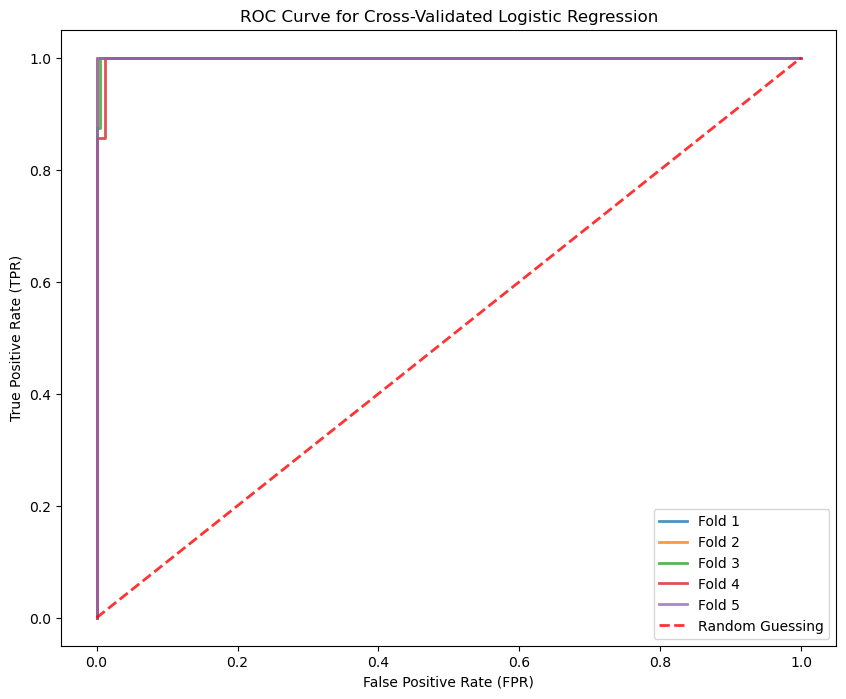

In [8]:

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Perform stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
mean_fpr = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv.split(X, y)):
    model.fit(X.iloc[train], y.iloc[train])
    y_probs = model.predict_proba(X.iloc[test])[:, 1]
    fpr, tpr, thresholds = roc_curve(y.iloc[test], y_probs)
    plt.plot(fpr, tpr, lw=2, alpha=0.8, label=f'Fold {i+1}')

# Plot the ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guessing', alpha=0.8)

plt.title('ROC Curve for Cross-Validated Logistic Regression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()